# Assignment Guidelines

1. Any kind of plagiarism is not accepted. We will strictly follow institute policies for plagiarism.
2. Recommended programming languages: Python + Sklearn (only for classifiers)
3. Submission should include: Working code for each question separately and a report to show the
analysis of results and corresponding plots in each of the parts. Make sure to append all the
relevant details and plots in your report to support your results. You don’t have to upload any of
the result in the .zip file.
4. Submission Guideline: upload a single .zip file with name ’YourRoll PA1.zip’ and each solution
should be a .py file with name ’YourRoll Q1.py’ (consider for first question) and a report file
’YourRoll report.pdf’. No other file should be added in the folder.
5. Your code should run as $python3 <YourRoll Q2.py> <path to the dataset containing the train
and test set downloaded from the link.>
6. Any error encountered in running the code for TA will fetch you a straight zero for that particular
question.

## Question 2.

Download the dataset from this link. Perform multi-class classification using Decision
Trees and Random Decision Forest (RDF). You can use Sklearn library. You can perform hyperparameter
tuning to improve your results and mention them in the report.
1. Report the following results on the training and test sets: 

(a) Accuracy

(b) Confusion matrix

(c) Precision and Recall

(d) Sensitivity and Specificity

(e) ROC curve (one for Decision tree and one for random forest)

(f) Plot and visualize your decision tree (Only for Decision Tree, not Random Forest).


`5 * 6 = 30 marks`


2. Compare and report accuracy achieved using Decision Trees and Random Forest on test set provided in question 2 above and suggest which classifier is better and why. Plot a single ROC curve

corresponding to both the classifiers and compare their Area Under the Curve (AUC) scores and
include them in your report.

Data : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

`5*2 + 5 + 5 = 20 marks`

### Importing all the Modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import multilabel_confusion_matrix, plot_confusion_matrix, roc_auc_score
from sklearn import datasets
from sklearn import preprocessing

from itertools import cycle

import graphviz
import matplotlib.pyplot as plt


RANDOM_SEED=13

### Loading the dataset

In [2]:
file_name = "iris.data"

data_df = pd.read_csv(file_name, header = None)
column_header = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data_df.columns = column_header

In [3]:
data_df.shape

(150, 5)

In [4]:
data_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Encoding the class label 

le = preprocessing.LabelEncoder()
data_df["class"] = le.fit_transform(data_df['class'])

In [7]:
data_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting the dataset

In [8]:
# Seperating the class label and the input features 

# Create X (features)
X = data_df.drop("class", axis=1)

# Create y (labels)
Y = data_df["class"]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [12]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state = RANDOM_SEED)

In [12]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
109,7.2,3.6,6.1,2.5
39,5.1,3.4,1.5,0.2
93,5.0,2.3,3.3,1.0
42,4.4,3.2,1.3,0.2
54,6.5,2.8,4.6,1.5


In [13]:
y_train.head()

109    2
39     0
93     1
42     0
54     1
Name: class, dtype: int64

## Training with Decision Tree 

a). Training with `criterion=GINI` and all other Hyperparameter as default

In [14]:
clf_tree = DecisionTreeClassifier(criterion='gini')
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
# Hyperparameters used

clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Prediction

In [16]:
y_pred = clf_tree.predict(X_test)

In [17]:
y_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       2])

### Evaluating the result

#### 1. Accuracy 

In [18]:
accuracy = accuracy_score(y_test, y_pred)

#### 2. Confusion matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)

#### 3. Precision and Recall

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      1.00      0.89        12
           2       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45



#### 4. Sensitivity and Specificity

In [21]:
mcm = multilabel_confusion_matrix(y_test, y_pred)

In [22]:
mcm

array([[[31,  0],
        [ 0, 14]],

       [[30,  3],
        [ 0, 12]],

       [[26,  0],
        [ 3, 16]]])

In [23]:
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

In [24]:
sensitivity = tp / (tp + fn) 
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

### Decision Tree Performance Matrix on this IRIS Data Set 

In [25]:
print("****************************************")
print("Accuracy : ")
print(accuracy)
print("****************************************")
print("Confusion Matrix : ")
print(cm)
print("****************************************")
print("Precision for each class :")
print(precision)
print("****************************************")
print("Sensitivity for each class :")
print(sensitivity)
print("****************************************")
print("Specificity for each class :")
print(specificity)

****************************************
Accuracy : 
0.9333333333333333
****************************************
Confusion Matrix : 
[[14  0  0]
 [ 0 12  0]
 [ 0  3 16]]
****************************************
Precision for each class :
[1.  0.8 1. ]
****************************************
Sensitivity for each class :
[1.         1.         0.84210526]
****************************************
Specificity for each class :
[1.         0.90909091 1.        ]


In [26]:
y_probs = clf_tree.predict_proba(X_test)

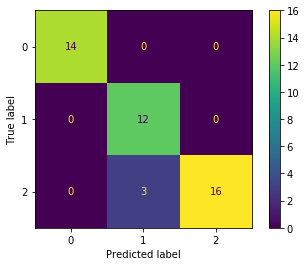

In [27]:
plot_confusion_matrix(clf_tree, X_test, y_test)

#### 5. ROC AUC Score 

In [28]:
rocauc_score = roc_auc_score(y_test, y_probs, multi_class='ovr', average="weighted")
rocauc_score = round(rocauc_score, 4)

In [29]:
print("****************************************")
print(f"ROC AUC Score is : {rocauc_score}")
print("(with One-vs-Rest(weighted))")
print("****************************************")


****************************************
ROC AUC Score is : 0.9545
(with One-vs-Rest(weighted))
****************************************


### ROC Curve for Decission Tree

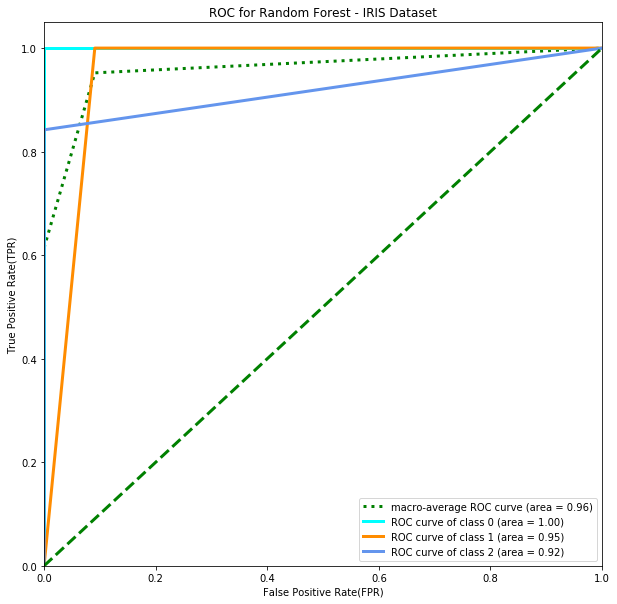

In [57]:
# Total no. of unique class 
n_classes = len(Y.unique())

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Final averaging it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
line_width=3
plt.figure(figsize=(10,10))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', lw=line_width)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=line_width,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='green', lw=line_width)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC for Random Forest - IRIS Dataset')
plt.legend(loc="lower right")
plt.show()

## Training with Random Forest Classifier

In [60]:
clf_tree2 = RandomForestClassifier(n_estimators=10)

In [61]:
clf_tree2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
# Hyperparameters used

clf_tree2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Prediction

In [63]:
y_pred2 =clf_tree2.predict(X_test)

In [64]:
y_pred2

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       2])

### Evaluating the result

#### 1. Accuracy 

In [65]:
accuracy2 = accuracy_score(y_test, y_pred2)

#### 2. Confusion matrix


In [66]:
type(y_pred2)

numpy.ndarray

In [67]:
type(y_test)

pandas.core.series.Series

In [68]:
y_pred2

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       2])

In [69]:
cm2 = confusion_matrix(y_test, y_pred2)

#### 3. Precision and Recall


In [72]:
y_pred2

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       2])

In [70]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      1.00      0.89        12
           2       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45



#### 4. Sensitivity and Specificity

In [41]:
mcm2 = multilabel_confusion_matrix(y_test, y_pred2)

In [42]:
mcm2

array([[[31,  0],
        [ 0, 14]],

       [[30,  3],
        [ 0, 12]],

       [[26,  0],
        [ 3, 16]]])

In [43]:
tn2 = mcm2[:, 0, 0]
tp2 = mcm2[:, 1, 1]
fn2 = mcm2[:, 1, 0]
fp2 = mcm2[:, 0, 1]

In [44]:
sensitivity2 = tp2 / (tp2 + fn2) 
specificity2 = tn2 / (tn2 + fp2)
precision2 = tp2 / (tp2 + fp2)

### Random Forest Classifier Performance Matrix on this IRIS Data Set 

In [45]:
print("****************************************")
print("Accuracy : ")
print(accuracy2)
print("****************************************")
print("Confusion Matrix : ")
print(cm2)
print("****************************************")
print("Precision for each class :")
print(precision2)
print("****************************************")
print("Sensitivity for each class :")
print(sensitivity2)
print("****************************************")
print("Specificity for each class :")
print(specificity2)

****************************************
Accuracy : 
0.9333333333333333
****************************************
Confusion Matrix : 
[[14  0  0]
 [ 0 12  0]
 [ 0  3 16]]
****************************************
Precision for each class :
[1.  0.8 1. ]
****************************************
Sensitivity for each class :
[1.         1.         0.84210526]
****************************************
Specificity for each class :
[1.         0.90909091 1.        ]


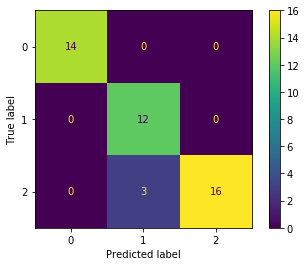

In [46]:
plot_confusion_matrix(clf_tree2, X_test, y_test)

In [47]:
y_probs2 = clf_tree2.predict_proba(X_test)

#### 5. ROC AUC Score 

In [48]:
rocauc_score2 = roc_auc_score(y_test, y_probs2, multi_class='ovr', average="weighted")
rocauc_score2 = round(rocauc_score2, 4)

In [49]:
print("****************************************")
print(f"ROC AUC Score is : {rocauc_score2}")
print("(with One-vs-Rest(weighted))")
print("****************************************")


****************************************
ROC AUC Score is : 0.9977
(with One-vs-Rest(weighted))
****************************************


### ROC Curve for Random Forest


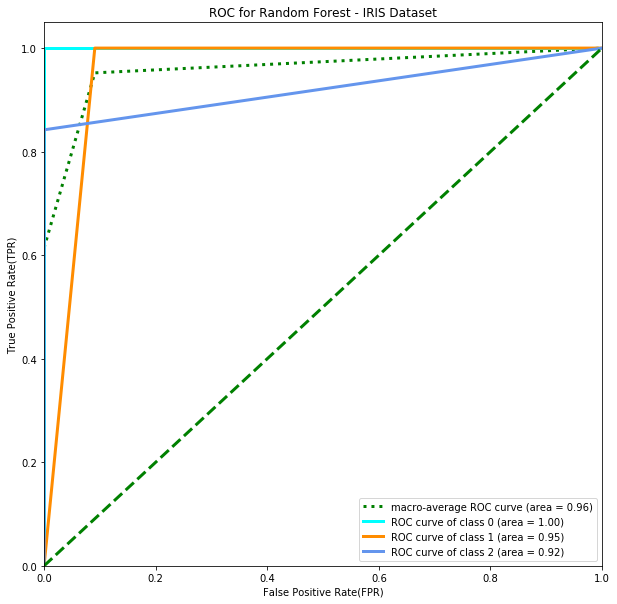

In [50]:
# Total no. of unique class 
n_classes = len(Y.unique())

# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred2))[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Aggregate all false positive rates
all_fpr2 = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr2 = np.zeros_like(all_fpr2)

for i in range(n_classes):
    mean_tpr2 += np.interp(all_fpr2, fpr2[i], tpr2[i])

# Final averaging it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = all_fpr2
tpr2["macro"] = mean_tpr2
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot the ROC curves
line_width=3
plt.figure(figsize=(10,10))
plt.plot(fpr2["macro"], tpr2["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc2["macro"]),
         color='green', linestyle=':', lw=line_width)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr2[i], tpr2[i], color=color, lw=line_width,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc2[i]))

plt.plot([0, 1], [0, 1], 'k--',color='green', lw=line_width)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC for Random Forest - IRIS Dataset')
plt.legend(loc="lower right")
plt.show()

## ROC Curve between Decision Tree(DT) and Random Forest(RF) 


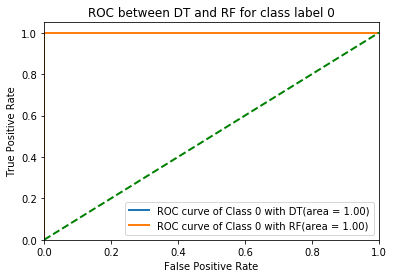

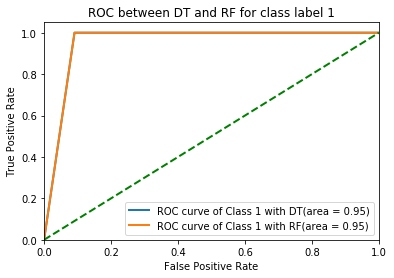

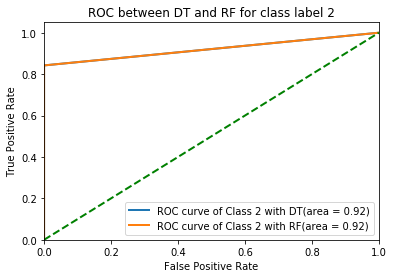

In [51]:
line_width=2

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of Class {i} with DT(area = %0.2f)' % roc_auc[i], lw=line_width)
    plt.plot(fpr2[i], tpr2[i], label=f'ROC curve of Class {i} with RF(area = %0.2f)' % roc_auc2[i], lw=line_width)
    plt.plot([0, 1], [0, 1], 'k--',color='green', lw=line_width)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC between DT and RF for class label {i}')
    plt.legend(loc="lower right")
    plt.show()

## Plot and visualize your Decision Tree

In [52]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=data_df.columns[:-1],  
                     class_names=le.classes_,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(filename='DT_Graph')

'DT_Graph.pdf'